In [1]:
#Load libraries 
import os
import pandas as pd 
import numpy as np 
import fancyimpute 
import matplotlib.pyplot as plt 
from scipy.stats import chi2_contingency 
import seaborn as sns
from random import randrange, uniform 

Using TensorFlow backend.


In [2]:
from fancyimpute import KNN

In [3]:
from scipy import stats

In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
import statsmodels.api as sm # libary for linear regression 

In [6]:
#Set working directory
os.chdir("D:\Data Scientist\Project\Employee Absenteeism")

In [7]:
#Load data 
emp = pd.read_excel("Absenteeism_at_work_Project.xls")

In [8]:
emp.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [9]:
emp.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [10]:
# From the EDA and problem statement file categorising the variables in two category " Continuos" and "Categorical"
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

# Missing value analysis 

In [11]:
#create a dataframe with missing value percentage 

missing_val = pd.DataFrame(emp.isnull().sum())

In [12]:
missing_val

,0
ID,0
Reason for absence,3
Month of absence,1
Day of the week,0
Seasons,0
Transportation expense,7
Distance from Residence to Work,3
Service time,3
Age,3
Work load Average/day,10


In [13]:
#Reset index
missing_val = missing_val.reset_index()

In [14]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

In [15]:
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(emp))*100

In [16]:
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

In [17]:
#save output results 
missing_val.to_csv("Miising_perc_py.csv", index = False)

# Imputing missing value 

In [18]:
# emp['Body mass index'].loc[22] = np.nan

In [19]:
# emp['Body mass index'].loc[22]


In [20]:
#Impute with mean
# emp['Body mass index'] = emp['Body mass index'].fillna(emp['Body mass index'].mean())


In [21]:
# Impute with median 
# emp['Body mass index'] = emp['Body mass index'].fillna(emp['Body mass index'].median())

In [22]:
# Apply KNN imputation 
emp = pd.DataFrame(KNN(k = 3).fit_transform(emp), columns = emp.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.867
Imputing row 101/740 with 1 missing, elapsed time: 0.903
Imputing row 201/740 with 0 missing, elapsed time: 0.907
Imputing row 301/740 with 0 missing, elapsed time: 0.910
Imputing row 401/740 with 0 missing, elapsed time: 0.912
Imputing row 501/740 with 0 missing, elapsed time: 0.914
Imputing row 601/740 with 0 missing, elapsed time: 0.916
Imputing row 701/740 with 0 missing, elapsed time: 0.917


In [23]:
missing_val = pd.DataFrame(emp.isnull().sum())

In [24]:
emp.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Outlier Aalysis 


Text(0, 0.5, 'Values')

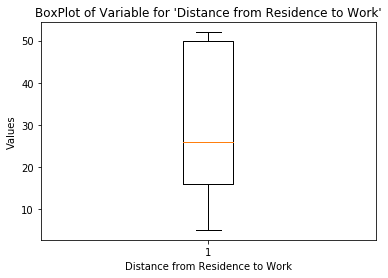

In [25]:
plt.boxplot(emp['Distance from Residence to Work'])
plt.xlabel("Distance from Residence to Work")
plt.title("BoxPlot of Variable for 'Distance from Residence to Work'")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

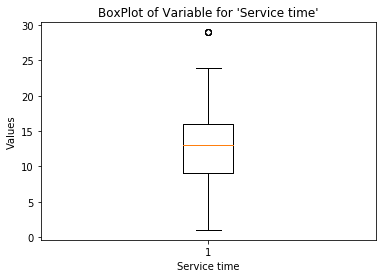

In [26]:
plt.boxplot(emp['Service time'])
plt.xlabel("Service time")
plt.title("BoxPlot of Variable for 'Service time'")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

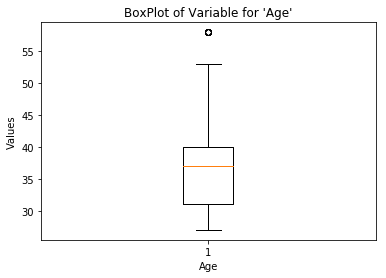

In [27]:
plt.boxplot(emp['Age'])
plt.xlabel("Age")
plt.title("BoxPlot of Variable for 'Age'")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

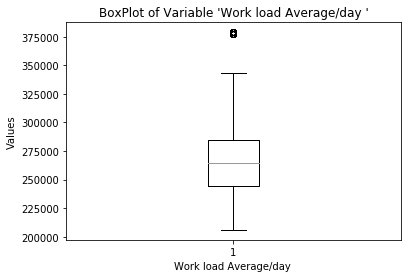

In [28]:
plt.boxplot(emp['Work load Average/day '])
plt.xlabel("Work load Average/day ")
plt.title("BoxPlot of Variable 'Work load Average/day '")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

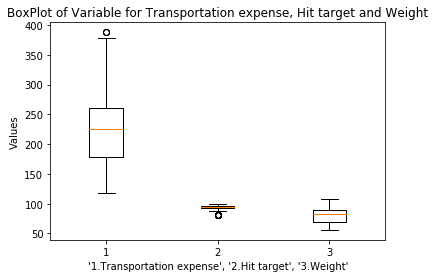

In [29]:
plt.boxplot([ emp['Transportation expense'],emp['Hit target'], emp['Weight'] ])
plt.xlabel("'1.Transportation expense', '2.Hit target', '3.Weight'")
plt.title("BoxPlot of Variable for Transportation expense, Hit target and Weight")
plt.ylabel('Values')

Text(0, 0.5, 'Values')

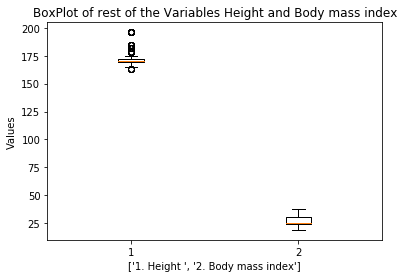

In [30]:
plt.boxplot([ emp['Height'], emp['Body mass index'] ])
plt.xlabel(['1. Height ', '2. Body mass index'])
plt.title("BoxPlot of rest of the Variables Height and Body mass index")
plt.ylabel('Values')

In [31]:
# From the above boxplot we can clearly see that in variables 'Distance from Residence to Work','Hit target' 'Weight' and 'Body mass index'
# there is no outlier

In [32]:
# list of variables which doesn't have outlier
ignore = ['Distance from Residence to Work','Hit target' 'Weight', 'Body mass index']

In [33]:
# Looping over all continuou variables to detect and remove Outliers
for i in continuous_vars:
    # Avoiding the variables which doesn't have outlier
    if i in ignore:
        continue
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(emp[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25

In [34]:
# Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

In [35]:
# Replacing all the outliers value to NA
    emp.loc[emp[i]< minimum,i] = np.nan
    emp.loc[emp[i]> maximum,i] = np.nan

In [36]:
# Imputing missing values with KNN
emp = pd.DataFrame(KNN(k = 3).fit_transform(emp), columns = emp.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.290
Imputing row 101/740 with 0 missing, elapsed time: 0.292
Imputing row 201/740 with 0 missing, elapsed time: 0.293
Imputing row 301/740 with 0 missing, elapsed time: 0.295
Imputing row 401/740 with 0 missing, elapsed time: 0.296
Imputing row 501/740 with 0 missing, elapsed time: 0.297
Imputing row 601/740 with 0 missing, elapsed time: 0.298
Imputing row 701/740 with 0 missing, elapsed time: 0.300


In [37]:
emp.isnull().sum().sum()

0

# Feature Selection

In [38]:
##Correlation analysis for continuous variables
#Correlation plot
emp_corr = emp.loc[:,continuous_vars]

In [39]:
emp_corr.shape

(740, 10)

[]

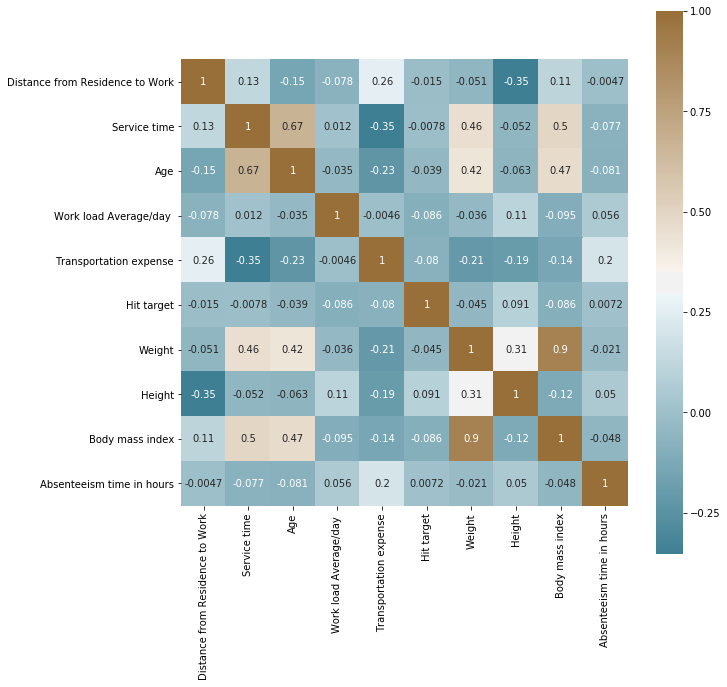

In [40]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = emp_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [41]:
for i in categorical_vars:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(emp['Absenteeism time in hours'],emp[i]))
    print(p)

ID
0.10431759579982797
Reason for absence
7.227995875887755e-100
Month of absence
0.24663945902647105
Day of the week
0.5333626247892
Seasons
0.00224856476856202
Disciplinary failure
3.422028992348971e-69
Education
1.0
Social drinker
1.871623113896839e-72
Social smoker
0.0746606491689172
Pet
0.9999999614655947
Son
1.2392714397316412e-61


In [42]:
emp1 = emp

In [43]:
# Droping the variables which has redundant information
to_drop = ['Weight','ID', 'Month of absence', 'Education', 'Pet']
emp = emp.drop(to_drop, axis = 1)

In [44]:
# Updating the Continuous Variables and Categorical Variables after droping some variables
continuous_vars = [i for i in continuous_vars if i not in to_drop]
categorical_vars = [i for i in categorical_vars if i not in to_drop]

# Feature Scaling 

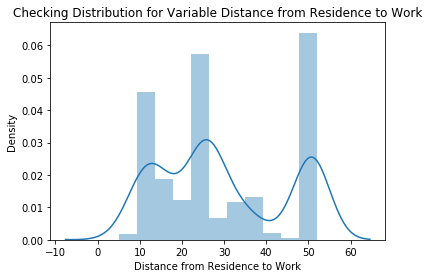

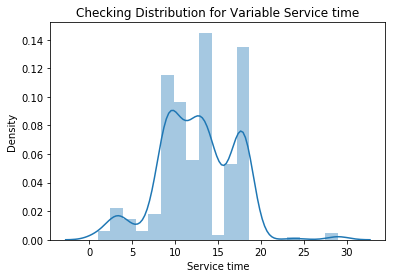

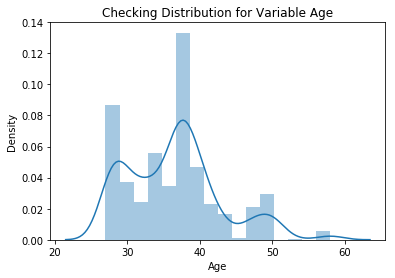

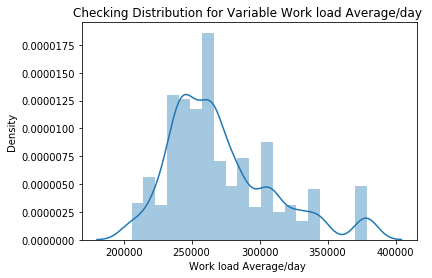

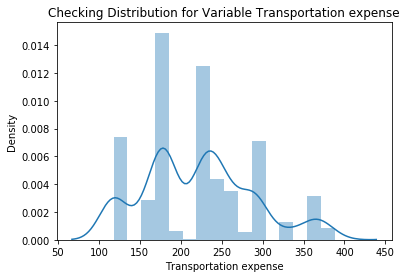

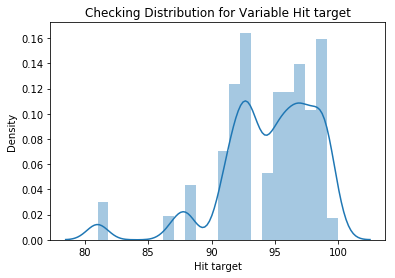

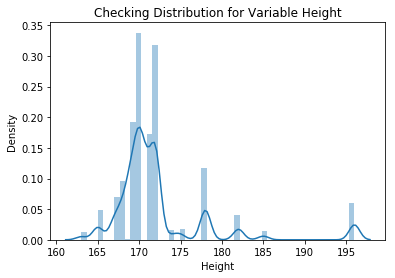

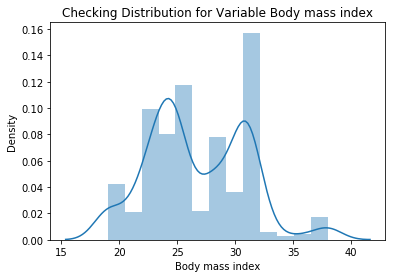

In [45]:
# Checking if there is any normally distributed variable in data
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(emp[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [46]:
# Since there is no normally distributed curve in any of the variable we will use Normalizationg for Feature Scalling
# #Normalization
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    emp[i] = (emp[i] - emp[i].min())/(emp[i].max()-emp[i].min())

In [47]:
emp.head(10)

,Reason for absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Social smoker,Height,Body mass index,Absenteeism time in hours
0,26.0,3.0,1.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,2.0,1.0,0.0,0.272727,0.578947,4.000000
1,0.0,3.0,1.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,1.0,1.0,0.0,0.454545,0.631579,0.000000
2,23.0,4.0,1.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,1.0,0.0,0.212121,0.631579,2.000000
3,7.0,5.0,1.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,2.0,1.0,1.0,0.151515,0.263158,4.000000
4,23.0,5.0,1.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,2.0,1.0,0.0,0.272727,0.578947,2.000000
5,23.0,6.0,1.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,1.0,0.0,0.212121,0.631579,2.000009
6,22.0,6.0,1.0,0.875629,1.000000,0.071429,0.032258,0.194471,0.842105,0.0,1.0,1.0,0.0,0.272727,0.421053,8.000000
7,23.0,6.0,1.0,0.525926,0.957447,0.357143,0.290323,0.194471,0.842105,0.0,4.0,1.0,0.0,0.151515,0.210526,4.000000
8,19.0,2.0,1.0,0.137037,0.148936,0.464286,0.225806,0.194471,0.842105,0.0,2.0,1.0,0.0,1.000000,0.315789,3.279386
9,22.0,2.0,1.0,0.433333,0.127660,0.464286,0.322581,0.194471,0.842105,0.0,1.0,0.0,0.0,0.272727,0.526316,8.000000


# ML Algorithm

In [48]:
## dividing data into train and test
#RMSE = 2.998
#acuracy = 97.002
train,test = train_test_split(emp,test_size= 0.2)

In [49]:
train.shape

(592, 16)

In [50]:
# Decision Tree Regression
#
fit_dt = DecisionTreeRegressor(max_depth = 2).fit(train.iloc[:,0:15],train.iloc[:,15])

In [51]:
fit_dt

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [52]:
predictions_dt = fit_dt.predict(test.iloc[:,0:15])

In [53]:
predictions_dt

array([3.03713368, 6.34388695, 3.03713368, 3.03713368, 7.55555556,
       6.34388695, 3.03713368, 6.34388695, 0.79999614, 3.03713368,
       3.03713368, 3.03713368, 0.79999614, 6.34388695, 6.34388695,
       3.03713368, 6.34388695, 3.03713368, 6.34388695, 3.03713368,
       6.34388695, 6.34388695, 6.34388695, 0.79999614, 6.34388695,
       3.03713368, 3.03713368, 3.03713368, 6.34388695, 3.03713368,
       3.03713368, 0.79999614, 3.03713368, 6.34388695, 6.34388695,
       3.03713368, 3.03713368, 3.03713368, 6.34388695, 3.03713368,
       3.03713368, 6.34388695, 3.03713368, 6.34388695, 6.34388695,
       3.03713368, 3.03713368, 3.03713368, 3.03713368, 6.34388695,
       3.03713368, 3.03713368, 3.03713368, 3.03713368, 3.03713368,
       6.34388695, 3.03713368, 3.03713368, 3.03713368, 6.34388695,
       6.34388695, 6.34388695, 3.03713368, 3.03713368, 6.34388695,
       3.03713368, 3.03713368, 3.03713368, 6.34388695, 3.03713368,
       3.03713368, 6.34388695, 3.03713368, 6.34388695, 6.34388

In [54]:
mse_dt = np.sqrt(mean_squared_error(test.iloc[:,15], predictions_dt))
print(mse_dt)

2.97565257606366


# Random forest 
# n = 100
# RMSE = 2.840
# acurracy = 97.16

In [55]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

In [56]:
X_train, X_test, y_train, y_test = train_test_split( emp.iloc[:, emp.columns != 'Absenteeism time in hours'], emp.iloc[:, 15], test_size = 0.20, random_state = 1)

In [57]:
#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 1).fit(X_train,y_train)

In [58]:
#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

In [59]:
mse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))

In [60]:
mse_rf

2.8598498459153343

# Linear Regression 
# RMSE = 3.39
# Acurracy = 96.61

In [61]:
#Train the model using the train data set 
lr_model = sm.OLS(train.iloc[:,15],train.iloc[:,0:15]).fit()

In [62]:
#print the model stats
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.693
Model:                                   OLS   Adj. R-squared:                  0.685
Method:                        Least Squares   F-statistic:                     86.77
Date:                       Sun, 26 May 2019   Prob (F-statistic):          6.71e-137
Time:                               22:04:55   Log-Likelihood:                -1504.9
No. Observations:                        592   AIC:                             3040.
Df Residuals:                            577   BIC:                             3106.
Df Model:                                 15                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Reason for absence                 -0.1065      0.017     -6.093      0.000      -0.141      -0.072
Day of the week                     0.1121      0.090      1.251      0.211      -0.064       0.288
Seasons                             0.1611      0.116      1.386      0.166      -0.067       0.390
Transportation expense              3.9955      0.607      6.581      0.000       2.803       5.188
Distance from Residence to Work    -0.4294      0.577     -0.744      0.457      -1.563       0.705
Service time                        2.1237      1.290      1.647      0.100      -0.409       4.657
Age                                -1.7003      0.924     -1.840      0.066      -3.516       0.115
Work load Average/day               1.7442      0.572      3.048      0.002       0.620       2.868
Hit target                          1.9741      0.594      3.321      0.001       0.807       3.142
Disciplinary failure               -6.2573      0.704     -8.884      0.000      -7.641      -4.874
Son                                 0.3147      0.135      2.330      0.020       0.049       0.580
Social drinker                      0.3840      0.373      1.031      0.303      -0.348       1.116
Social smoker                       0.8310      0.558      1.490      0.137      -0.265       1.927
Height                              1.6809      0.838      2.005      0.045       0.034       3.328
Body mass index                     2.4444      0.744      3.286      0.001       0.983       3.905
==============================================================================
Omnibus:                      131.358   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.062
Skew:                           1.161   Prob(JB):                     1.55e-66
Kurtosis:                       5.626   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#predict 
prediction_lr = lr_model.predict(test.iloc[:,0:15])

In [64]:
mse_lr = np.sqrt(mean_squared_error(test.iloc[:,15], prediction_lr))

In [65]:
mse_lr

3.0792600134841197

In [66]:
emp.head(10)

,Reason for absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Social smoker,Height,Body mass index,Absenteeism time in hours
0,26.0,3.0,1.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,2.0,1.0,0.0,0.272727,0.578947,4.000000
1,0.0,3.0,1.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,1.0,1.0,0.0,0.454545,0.631579,0.000000
2,23.0,4.0,1.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,1.0,0.0,0.212121,0.631579,2.000000
3,7.0,5.0,1.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,2.0,1.0,1.0,0.151515,0.263158,4.000000
4,23.0,5.0,1.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,2.0,1.0,0.0,0.272727,0.578947,2.000000
5,23.0,6.0,1.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,1.0,0.0,0.212121,0.631579,2.000009
6,22.0,6.0,1.0,0.875629,1.000000,0.071429,0.032258,0.194471,0.842105,0.0,1.0,1.0,0.0,0.272727,0.421053,8.000000
7,23.0,6.0,1.0,0.525926,0.957447,0.357143,0.290323,0.194471,0.842105,0.0,4.0,1.0,0.0,0.151515,0.210526,4.000000
8,19.0,2.0,1.0,0.137037,0.148936,0.464286,0.225806,0.194471,0.842105,0.0,2.0,1.0,0.0,1.000000,0.315789,3.279386
9,22.0,2.0,1.0,0.433333,0.127660,0.464286,0.322581,0.194471,0.842105,0.0,1.0,0.0,0.0,0.272727,0.526316,8.000000


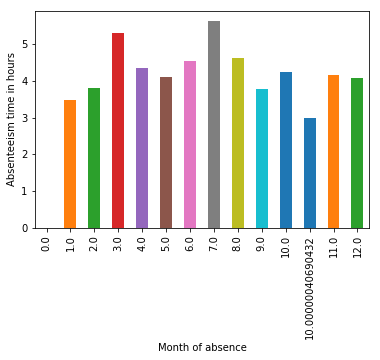

In [69]:
emp1.groupby('Month of absence')['Absenteeism time in hours'].mean().plot.bar()
#df_obsent.groupby(col)[col_y].reset_index().sort_values(col_y).plot.bar()
plt.xlabel('Month of absence') # Set text for the x axis
plt.ylabel('Absenteeism time in hours')# Set text for y axis

plt.show()

In [70]:
###2. Question  
##How much losses every month can we project in 2011 if same trend of absenteeism continues?
#Mean of Absenteesim time in hours 
emp1.groupby('Month of absence')['Absenteeism time in hours'].mean()

Month of absence
0.0     0.000000
1.0     3.479657
2.0     3.805617
3.0     5.295066
4.0     4.347695
5.0     4.113187
6.0     4.522225
7.0     5.621510
8.0     4.621287
9.0     3.767692
10.0    4.246114
10.0    3.000000
11.0    4.151946
12.0    4.070523
Name: Absenteeism time in hours, dtype: float64

In [72]:
# loss per month 
#Work loss = (Workload*Absenteeism time)/Service time
loss = emp1[['Month of absence','Service time','Work load Average/day ','Absenteeism time in hours']]

In [73]:
loss["loss_month"] = (loss['Work load Average/day ']*loss['Absenteeism time in hours'])/loss['Service time']

C:\Users\vimal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
loss.head

<bound method NDFrame.head of      Month of absence  Service time  Work load Average/day   \
0                 7.0          13.0                239554.0   
1                 7.0          18.0                239554.0   
2                 7.0          18.0                239554.0   
3                 7.0          14.0                239554.0   
4                 7.0          13.0                239554.0   
5                 7.0          18.0                239554.0   
6                 7.0           3.0                239554.0   
7                 7.0          11.0                239554.0   
8                 7.0          14.0                239554.0   
9                 7.0          14.0                239554.0   
10                7.0          11.0                239554.0   
11                7.0          11.0                239554.0   
12                7.0          11.0                239554.0   
13                7.0          18.0                239554.0   
14                7.0    

In [76]:
loss["loss_month"] = (loss['Work load Average/day ']*loss['Absenteeism time in hours'])/loss['Service time']

C:\Users\vimal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
loss["loss_month"] = np.round(loss["loss_month"]).astype('int64')

C:\Users\vimal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
loss.head(10)

,Month of absence,Service time,Work load Average/day,Absenteeism time in hours,loss_month
0,7.0,13.0,239554.0,4.000000,73709
1,7.0,18.0,239554.0,0.000000,0
2,7.0,18.0,239554.0,2.000000,26617
3,7.0,14.0,239554.0,4.000000,68444
4,7.0,13.0,239554.0,2.000000,36854
5,7.0,18.0,239554.0,2.000009,26617
6,7.0,3.0,239554.0,8.000000,638811
7,7.0,11.0,239554.0,4.000000,87111
8,7.0,14.0,239554.0,3.279386,56114
9,7.0,14.0,239554.0,8.000000,136888


In [79]:
No_absent = loss[loss['Month of absence'] == 0]['loss_month'].sum()
January = loss[loss['Month of absence'] == 1]['loss_month'].sum()
February = loss[loss['Month of absence'] == 2]['loss_month'].sum()
March = loss[loss['Month of absence'] == 3]['loss_month'].sum()
April = loss[loss['Month of absence'] == 4]['loss_month'].sum()
May = loss[loss['Month of absence'] == 5]['loss_month'].sum()
June = loss[loss['Month of absence'] == 6]['loss_month'].sum()
July = loss[loss['Month of absence'] == 7]['loss_month'].sum()
August = loss[loss['Month of absence'] == 8]['loss_month'].sum()
September = loss[loss['Month of absence'] == 9]['loss_month'].sum()
October = loss[loss['Month of absence'] == 10]['loss_month'].sum()
November = loss[loss['Month of absence'] == 11]['loss_month'].sum()
December = loss[loss['Month of absence'] == 12]['loss_month'].sum()

In [80]:
data1 = {'No Absent': No_absent, 'Janaury': January,'Febraury': February,'March': March,
       'April': April, 'May': May,'June': June,'July': July,
       'August': August,'September': September,'October': October,'November': November,
       'December': December}

In [83]:
workloss = pd.DataFrame.from_dict(data1,orient = 'index')

workloss.rename(index = str, columns={0:"Workload loss pr month"})

In [84]:
workloss.rename(index = str, columns={0:"Workload loss pr month"})

,Workload loss pr month
No Absent,0
Janaury,4730607
Febraury,7953840
March,11082061
April,6213617
May,7241316
June,11263511
July,11743319
August,6988009
September,4619421
